# Breast Cancer

- Prepared By: Ammar Nassan Alhaj Ali.
- Date: 2020-10-8.
- References: 1-introduction to machine learning with python a guide for data scientists 2017 (Andreas C. Müller and Sarah Guido).

# 1- The problem
- We will use the Breast Cancer dataset in Wisconsin, which records clinical measurements of breast cancer tumors.

 - Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

 ![iris](breast_cancer_detail_large.jpg)


 image source:https://www.ashray.net.in/en/breast-cancer/learning

In [19]:
#The data can be loaded using the load_breast_cancer function from scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [20]:
#The dataset consists of 569 data points, with 30 features each:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [21]:
print("cancer data: {}".format(cancer.data.shape))

cancer data: (569, 30)


In [22]:
print(cancer.feature_names)
print(cancer.DESCR)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
    

In [23]:
print(cancer.target_names)

['malignant' 'benign']


In [24]:
#Of these 569 data points, 212 are labeled as malignant and 357 as benign:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

print(cancer.target_names,np.bincount(cancer.target))


Sample counts per class:
{'malignant': 212, 'benign': 357}
['malignant' 'benign'] [212 357]


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

from sklearn.neighbors import KNeighborsClassifier


In [26]:
#Let’s investigate whether we can confirm the connection between model complexity and generalization.
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)


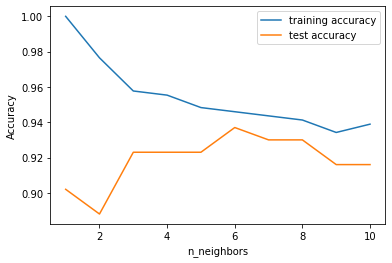

In [27]:
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [ ]:
#The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. While real-world plots are rarely very smooth, we can still recognize some of the characteristics of overfitting and underfitting